## Demand for stationary storage in Europe: 1950--2050
Based on the [2020 impact assessment by the European Commission](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=CELEX:52020SC0176).
Known points: no battery storage in 2015, 20-40GW by 2030, and 50-120GW by 2050.

Assumptions: no storage in 2021, logistic evolution, saturate in 2050.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl

In [25]:
def evol_logistic(T_years, T0, y_max, T_mid, slope):
    y = pd.Series(data = np.zeros(len(T_years)), index = T_years)
    for T in 1 + np.arange(T0, T_years[-1]):
        y.loc[T] = y_max / (1 + np.exp(-slope*(T - T_mid)))
    return y

In [95]:
T_years = np.arange(1950, 2051)
df_GW = pd.DataFrame(index = T_years)
df_GW['low'] = evol_logistic(T_years, T0 = 2021, y_max = 50, T_mid = 2030.75, slope = 0.5)
df_GW['medium'] = evol_logistic(T_years, T0 = 2021, y_max = 85, T_mid = 2031.25, slope = 0.5)
df_GW['high'] = evol_logistic(T_years, T0 = 2021, y_max = 120, T_mid = 2031.4, slope = 0.5)

### Plot and export to csv

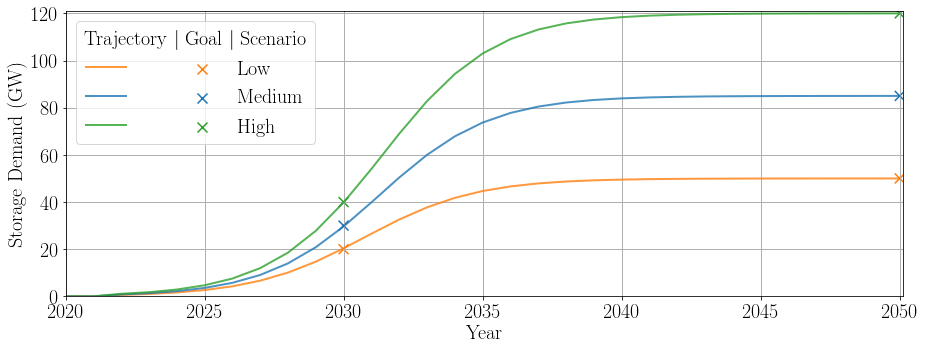

In [99]:
# layout
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
fig = plt.figure(figsize=[15, 5.25])
plt.rcParams.update({'font.size': 20})
transp = 0.8
# plots
# - low
plt.plot(df_GW['low'], label = ' ', linewidth = 2, color = 'tab:orange', alpha = transp)
plt.scatter([2030, 2050], [20, 50], s = [100, 100], marker = 'x', label = 'Low   ', color = 'tab:orange')
# - medium
plt.plot(df_GW['medium'], label = ' ', linewidth = 2, color = 'tab:blue', alpha = transp)
plt.scatter([2030, 2050], [30, 85], s = [100, 100], marker = 'x', label = 'Medium', color = 'tab:blue')
# - high
plt.plot(df_GW['high'], label = ' ', linewidth = 2, color = 'tab:green', alpha = transp)
plt.scatter([2030, 2050], [40, 120], s = [100, 100], marker = 'x', label = 'High', color = 'tab:green')
# layout
plt.legend(loc = 'upper left', title = r'Trajectory $\vert$ Goal $\vert$ Scenario', ncol = 2)
plt.grid(linewidth=1)
plt.xlabel('Year')
plt.ylabel('Storage Demand (GW)')
plt.xlim((2020, 2050.1))
plt.ylim((0, 121))
fig.savefig('storage_demand_GW.pdf',bbox_inches='tight')
# export to csv
df_GW.to_csv('storage_demand_GW.csv')
df_GW.to_excel('storage_demand_GW.xlsx')